In [1]:
file=open(r'Homework_sampledata1.txt','r')
lines=file.readlines()
file.close()
lines=lines[1:]
for i in range(len(lines)):
    lines[i]=lines[i].split()[1:]
for i in range(len(lines)):
    for j in range(len(lines[i])):
        lines[i][j]=float(lines[i][j])


# Exercise1

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
for i in range (len(lines)):
    for j in range (len(lines[i])):
        if lines[i][j] == -99:
            lines[i][j] = np.nan
        lines[i][j]=lines[i][j]


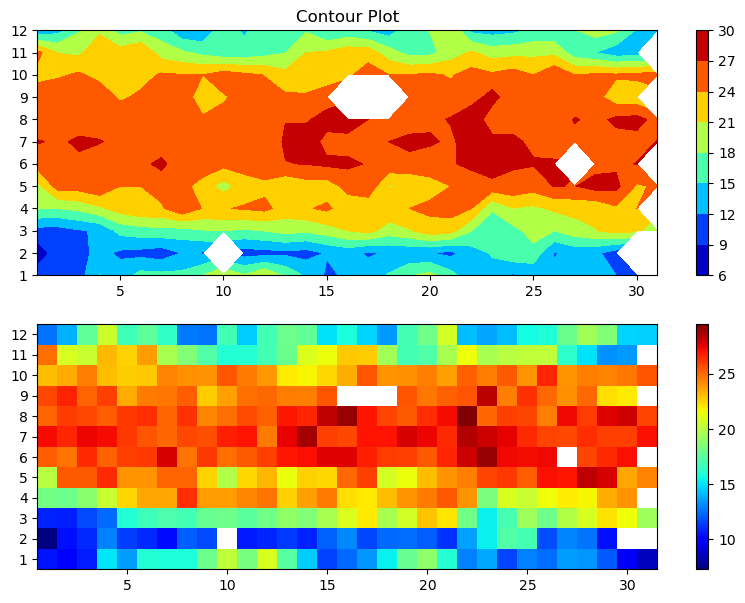

In [4]:
import numpy.ma as ma
data=np.array(lines)
data_masked=ma.masked_invalid(data)
data_masked=data_masked.T
x = np.linspace(1, 31, data_masked.shape[1])
y = np.linspace(1, 12, data_masked.shape[0])
X,Y=np.meshgrid(x,y)
fig=plt.figure(figsize=(10,7))
ax = fig.add_subplot(2,1,1)
plt.contourf(X,Y,data_masked,cmap='jet')
plt.yticks(np.arange(1,13,1))
plt.colorbar()
plt.title('Contour Plot')
ax = fig.add_subplot(2,1,2)
plt.pcolormesh(X,Y,data_masked,cmap='jet')
plt.colorbar()
plt.yticks(np.arange(1,13,1))
plt.subplots_adjust( wspace = 0.2)
plt.show()



## exercise3



In [5]:
from math import pi 
labels=['feature1','feature2','feature3','feature4','feature5','feature6']


In [6]:
data=np.array(lines)
data=data.T
data=ma.masked_invalid(data)

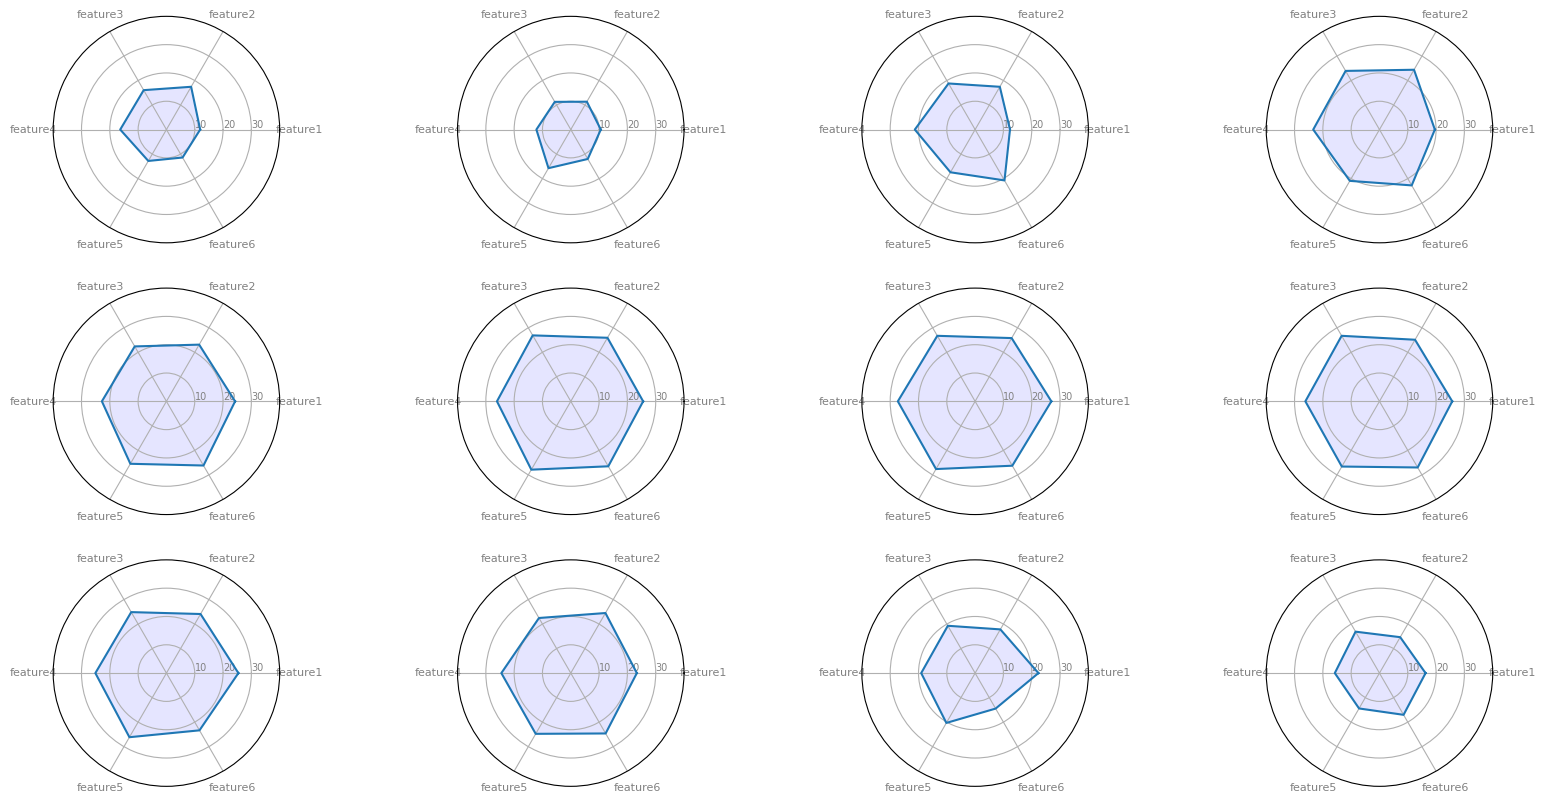

In [7]:
from math import pi 
labels=['feature1','feature2','feature3','feature4','feature5','feature6']
fig = plt.figure(figsize=(20, 10))
no_category= 6
for i in range(data.shape[0]):
    feature1=np.average(data[i][:5])
    feature2=np.average(data[i][6:10])
    feature3=np.average(data[i][11:15])
    feature4=np.average(data[i][16:20])
    feature5=np.average(data[i][21:25])
    feature6=np.average(data[i][26:])
    feature_values = [feature1, feature2, feature3, feature4, feature5, feature6]
    feature_values += feature_values[:1]
    ax = plt.subplot(3, 4, i+1, polar=True)
    angles = [n / float(no_category) * 2 * pi for n in range(no_category)]
    angles += angles[:1]
    plt.xticks(angles[:-1],labels,color="grey",size=8)
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    plt.ylim(0,40)
    ax.plot(angles,feature_values,linestyle='solid')
    ax.fill(angles,feature_values,'b',alpha=0.1)

plt.show()


## exercise 4

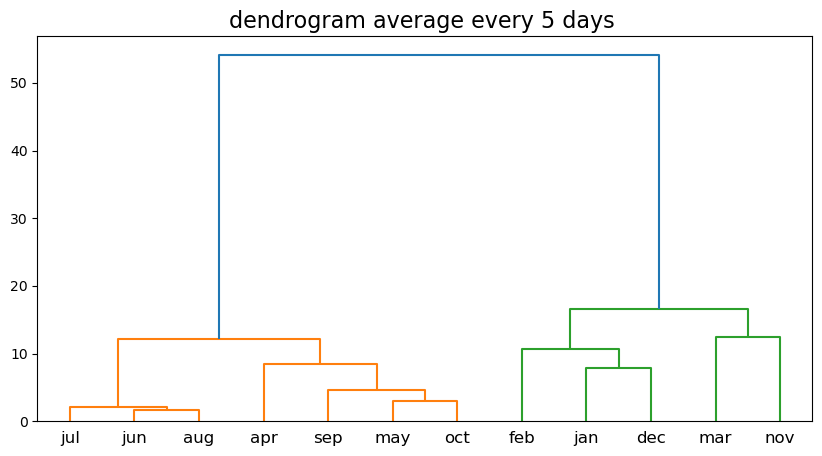

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
new_data=np.zeros((12,6))
for i in range(data.shape[0]):
    new_data[i][0]=np.average(data[i][:5])
    new_data[i][1]=np.average(data[i][6:10])
    new_data[i][2]=np.average(data[i][11:15])
    new_data[i][3]=np.average(data[i][16:20])
    new_data[i][4]=np.average(data[i][21:25])
    new_data[i][5]=np.average(data[i][26:])
list_month=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
z=linkage(new_data,'ward')
plt.figure(figsize=(10,5))
dendrogram(z, labels=list_month)
plt.title('dendrogram average every 5 days ',size=16)
plt.show()
        